# MA934 - Week 7 (assessed!) Problem Sheet

## Deadline: 17:00 (UK time) on Friday 24 November 

For this assignment, you must create a new Jupyter notebook called MA934_Week7_UniID.ipynb to contain the implementations that you write. This should also be exported as a .pdf file such that all execution output (from data to plots) is visible as produced on your own machine. You can separate out individual tasks if you prefer, but the full submission should be made as a single .zip via [our website](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/assessedwork/ma934declaration). The platform will not allow you to upload more than one file.

A few tips:
- please make sure to debug intermediate outputs as you code along. You are welcome to design smaller test cases and toy problems to verify your work (even if they are not part of the final submission).
- consider possible forms of input or arguments and make sure your solution can cope with *interesting* cases.
- do not forget to comment your code and use Markdown cells to explain what you are doing. A perfectly functional solution with no information about the thought process will not receive more than a subset of the points (~$70\%$ depending on the difficulty of the problem and how transparent the algorithm flow is). 
- generally getting used to writing tidy solutions is good practice. Feel free to use [online resources](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) for editing guidance.

## Task 1 - insertion sort

Add an implementation of the insertion sort algorithm to your solution. Check that it works by sorting some manageably small lists of random integers. The command ```random.sample(range(1, 200), 10)``` (after having imported the random module) creates a list of 10 random intergers in the range $1 - 200$ which you can use for more elaborate testing.

In [1]:
import numpy as np

def insertionSort(mas): #it returns mas sorted in ASCENDING order! if you need descending - take [::-1]
    n=len(mas)
    if (n==1):
        return mas
    for i in range(1,n): #go from left to right
        for j in range(i-1,-1,-1): #go from mas[i] left up to beginning and find the place for mas[i]
            if mas[j]>mas[j+1]:
                tmp=mas[j]
                mas[j]=mas[j+1]
                mas[j+1]=tmp
    return mas

#test1
mas=[5]
assert(insertionSort(mas)==[5])

#test2
mas=[2,1,-1,1,3]
assert(insertionSort(mas)==[-1,1,1,2,3])

#test3
available_choices=[x for x in range(-200,200,1)]
for n in range(1,100,20):
    mas=list(np.random.choice(available_choices, n))
    my_result=insertionSort(mas)
    ref_result=sorted(mas)
    assert(my_result==ref_result)
    
print("insertionSort is tested succesfully!")

insertionSort is tested succesfully!


We see that massives of different sizes are sorted properly!

## Task 2 - mergesort

Consider two lists of integers, list1 and list2, having lengths $n$ and $m$, respectively. Assuming that the elements of list1 and list2 are already sorted in ascending order, the following recursive function merges them to return an array of length $n+m$ whose elements are sorted in ascending order:

```Python
    def interlace(list1, list2):
    alist = []
    if (len(list1) == 0):
        return list2
    elif (len(list2) == 0):
        return list1
    elif list1[0] < list2[0]:
        alist.append(list1[0])
        return alist + interlace(list1[1:], list2)
    else:
        alist.append(list2[0])
        return alist + interlace(list1, list2[1:])
```

You have seen this function before (recall MA934_Week1_3_SortingAlgorithms.ipynb). Add it to your code, test it, and use it to implement the mergesort algorithm. Check that it works.

In [2]:
def mergeSortRecursive(mas):
    def interlaceRecursive(list1, list2):
        alist = []
        if (len(list1) == 0):
            return list2
        elif (len(list2) == 0):
            return list1
        elif list1[0] < list2[0]:
            alist.append(list1[0])
            return alist + interlaceRecursive(list1[1:], list2)
        else:
            alist.append(list2[0])
            return alist + interlaceRecursive(list1, list2[1:])
    
    n=len(mas)
    if n == 1:
        return mas  # an array of length 1 is already sorted
    else: 
        m=n//2 #there was a bug: m=n/2 instead of m=n//2 was written
        return interlaceRecursive(mergeSortRecursive(mas[0:m]), mergeSortRecursive(mas[m:n]))
    

#test1
mas=[5]
assert(mergeSortRecursive(mas)==[5])

#test2
mas=[2,1,-1,1,3]
assert(mergeSortRecursive(mas)==[-1,1,1,2,3])

#test3
available_choices=[x for x in range(-200,200,1)]
for n in range(1,100,20):
    mas=list(np.random.choice(available_choices, n))
    my_result=mergeSortRecursive(mas)
    ref_result=sorted(mas)
    assert(my_result==ref_result)

#test4
n=2**11
mas=list(np.random.choice(10, n))
my_result=mergeSortRecursive(mas)
ref_result=sorted(mas)
print("For n={} recursive mergesort still works".format(n))
assert(my_result==ref_result)

#test5
n=2**12
mas=list(np.random.choice(10, n))
try:
    my_result=mergeSortRecursive(mas)
    ref_result=sorted(mas)
    print("For n={} recursive mergesort still works".format(n))
    assert(my_result==ref_result)
except:
    print("For n={} recursive mergesort reaches the recursion depth limit".format(n))
    
print("mergeSortRecursive is tested succesfully!")

For n=2048 recursive mergesort still works
For n=4096 recursive mergesort reaches the recursion depth limit
mergeSortRecursive is tested succesfully!


We see that massivs of small length are sorted well, 
but massive of length 4096 can't be sorted bt recursive meargesort due to exceeding maximum depth in recursion;
And we also see that in the class realization there was a bug: $m=n/2$ (which gave non-integer m) instead of $m=n//2$

## Task 3 - fixing mergesort

You will probably find that your mergesort algorithm fails for moderately large array lengths (on my laptop, I could not viably process lists of length $2^{16}$ for example, but this is just a guide). The reason for this is that there are too many recursions: the code quickly exceeds the maximum allowed recursion depth. 

To fix this, write a non-recursive implementation of the ```interlace()``` function. Test your ```mergesort()``` function using the non-recursive version. How does it compare to the previous solution in terms of achievable list length?

In [3]:
def mergeSortNonRecursive(mas):
    def interlaceNonRecursive(left, right): 
        otv=[]
        i=j=0
        while i < len(left) and j < len(right): 
            if left[i] < right[j]: 
                otv.append(left[i]) #we put into otv the least of "current" elements of left and right
                i+=1
            else: 
                otv.append(right[j]) #we put into otv the least of "current" elements of left and right
                j+=1
        while i < len(left):  #we put all remaining elements from left to otv, if right has already ended
            otv.append(left[i])
            i+=1
        while j < len(right): #we put all remaining elements from right to otv, if left has already ended
            otv.append(right[j])
            j+=1
        return otv
    
    n=len(mas)
    if n == 1:
        return mas  # an array of length 1 is already sorted
    else: 
        m=n//2 #there was a bug: m=n/2 instead of m=n//2 was written
        return interlaceNonRecursive(mergeSortNonRecursive(mas[0:m]), mergeSortNonRecursive(mas[m:n]))
    
#test1
mas=[5]
assert(mergeSortNonRecursive(mas)==[5])

#test2
mas=[2,1,-1,1,3]
assert(mergeSortNonRecursive(mas)==[-1,1,1,2,3])

#test3
available_choices=[x for x in range(-200,200,1)]
for n in range(1,100,20):
    mas=list(np.random.choice(available_choices, n))
    my_result=mergeSortNonRecursive(mas)
    ref_result=sorted(mas)
    assert(my_result==ref_result)

#test4
n=2**11
mas=list(np.random.choice(10, n))
my_result=mergeSortNonRecursive(mas)
ref_result=sorted(mas)
print("For n={} recursive mergesort still works".format(n))
assert(my_result==ref_result)

#test5
n=2**15
mas=list(np.random.choice(10, n))
my_result=mergeSortNonRecursive(mas)
ref_result=sorted(mas)
print("For n={} recursive mergesort still works".format(n))
assert(my_result==ref_result)

#test6
n=2**20
mas=list(np.random.choice(10, n))
try:
    my_result=mergeSortNonRecursive(mas)
    ref_result=sorted(mas)
    print("For n={} recursive mergesort still works".format(n))
    assert(my_result==ref_result)
except:
    print("For n={} recursive mergesort reaches the recursion depth limit".format(n))
    
print("mergeSortNonRecursive is tested succesfully!")

For n=2048 recursive mergesort still works
For n=32768 recursive mergesort still works
For n=1048576 recursive mergesort still works
mergeSortNonRecursive is tested succesfully!


We see that nonrecursive mergesort sorts small massivs and it even sorts massive of length $2^{20}$, which was not true for recursive meargesort; my recursion limit is 3000

In [4]:
import sys
print(sys.getrecursionlimit())

3000


## Task 4 - runtime

Measure the runtime of your insertion sort and mergesort functions for random arrays of integers in the range $2$ to $2^{20}$. Save your results to a file.

This is the potentially complicated part of this task. Here are some pointers:
- recall we have touched upon the topic of runtime measurement and benchmarking when discussing matrix-matrix multiplication. 
- especially for small datasets, running your code multiple times and averaging the runtime may prove useful.
- this part of the worksheet will involve handling file operations; finding the key read/write functionality and getting accustomed to working with the documentation is an intentional part of the process, one that you should become more and more comfortable with.

In [5]:
import timeit
from tqdm import tqdm

#we go only to 2^12, because for greater i mergeSortRecursive will not work
mas_of_i=range(1,12)

# Initialise the list of runtimes with zeros
runtimesInsertion = [np.float32(0.0)] * len(mas_of_i)
runtimesMergeSortRecursive = [np.float32(0.0)] * len(mas_of_i)
runtimesMergeSortNonRecursive = [np.float32(0.0)] * len(mas_of_i)

# Initialise an iterator to zero as well
j=0

#how many times to run function for the same n and then average the resulting time
amtToAverage=20


for i in tqdm(mas_of_i):
    n=2**i
    print("i=", i)
    mas=list(np.random.choice(100, n))
    #print(mas)
    
    s=0
    for k in range(amtToAverage):
        starttime = timeit.default_timer()
        _ = insertionSort(mas)
        s += timeit.default_timer() - starttime
    runtimesInsertion[j] = s/amtToAverage
    
    s=0
    for k in range(amtToAverage):
        starttime = timeit.default_timer()
        _ = mergeSortRecursive(mas)
        s += timeit.default_timer() - starttime
    runtimesMergeSortRecursive[j] = s/amtToAverage
    
    s=0
    for k in range(amtToAverage):
        starttime = timeit.default_timer()
        _ = mergeSortNonRecursive(mas)
        s += timeit.default_timer() - starttime
    runtimesMergeSortNonRecursive[j] = s/amtToAverage
    j=j+1
    
print('Computational time is calculated.')

# write data to file 
with open("Task4_results.txt","w") as fout:
    fout.write("Mas of length is:\n")
    fout.write(" ".join(map(str, [2**i for i in mas_of_i])))
    fout.write("\n")
    fout.write("Mas of runtimesInsertion times is:\n")
    fout.write(" ".join(map(str, runtimesInsertion)))
    fout.write("\n")
    fout.write("Mas of runtimesMergeSortRecursive times is:\n")
    fout.write(" ".join(map(str, runtimesMergeSortRecursive)))
    fout.write("\n")
    fout.write("Mas of runtimesMergeSortNonRecursive times is:\n")
    fout.write(" ".join(map(str, runtimesMergeSortNonRecursive)))
    fout.write("\n")
    
print('Data is saved to Task4_results.txt')

 73%|███████▎  | 8/11 [00:00<00:00, 30.23it/s]

i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11


100%|██████████| 11/11 [00:10<00:00,  1.04it/s]

Computational time is calculated.
Data is saved to Task4_results.txt


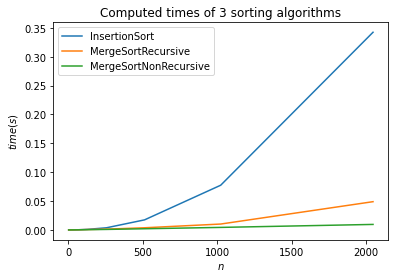

In [7]:
import matplotlib.pyplot as plt
mas_of_n=[2**i for i in mas_of_i]
plt.plot(mas_of_n, runtimesInsertion, label='InsertionSort')
plt.plot(mas_of_n, runtimesMergeSortRecursive, label='MergeSortRecursive')
plt.plot(mas_of_n, runtimesMergeSortNonRecursive, label='MergeSortNonRecursive')
plt.xlabel("$n$")
plt.ylabel("$time(s)$")
plt.legend()
plt.title('Computed times of 3 sorting algorithms')
plt.show()

We see that 
1) insertionsort is much slower than both mergesorts - and it is expected, because from lectures we know that InsertionSort makes  O($n^2$) operations on average, while meargesort makes O($n \log n$) operations.
2) Recursive mergesort is slower thar non recursive mergesort - and it is also expected, because recursion in expensive and requires additional resourse.
And in task 5 we will analyse, 
to which power of n is proportional the time of each of three sorting algorithms

## Task 5 - empirical analysis of computational complexity

Load your runtime results back from the file and plot them on a log-log scale. Fit your data to determine how the computational cost scales with the length of the input array for large array sizes. How does this compare to theoretical expectations (which you should state and briefly justify)?

In [8]:
results=[]
#read results from file and save only numbers, but not comments
with open("Task4_results.txt","r") as fin:
    for el in fin:
        el=el.strip().split()
        if el[0][0].isdigit():
            results.append(list(map(float,el)))

mas_of_n=results[0]
runtimesInsertion=results[1]
runtimesMergeSortRecursive=results[2]
runtimesMergeSortNonRecursive=results[3]

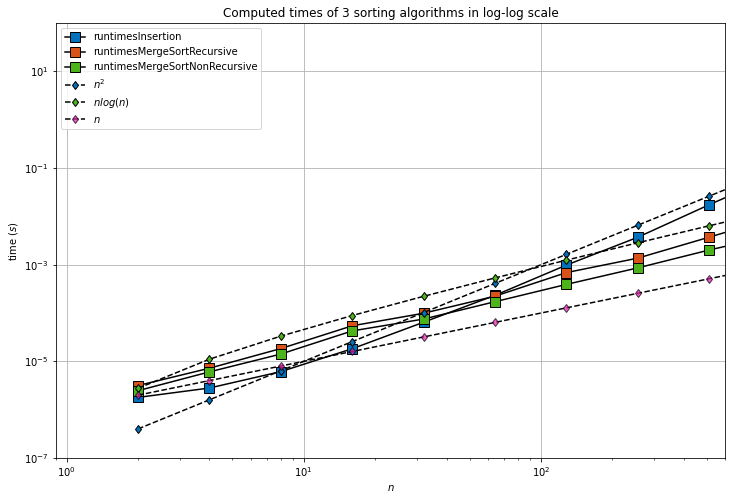

In [9]:
#plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))

plt.loglog(mas_of_n, [i for i in runtimesInsertion], "-ks", label=r"runtimesInsertion", markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.loglog(mas_of_n, [i for i in runtimesMergeSortRecursive], "-ks", label=r"runtimesMergeSortRecursive", markersize=10, markerfacecolor=(0.85, 0.325, 0.098, 1))
plt.loglog(mas_of_n, [i for i in runtimesMergeSortNonRecursive], "-ks", label=r"runtimesMergeSortNonRecursive", markersize=10, markerfacecolor=(0.3, 0.7, 0.1, 1))
plt.loglog(mas_of_n, 1e-7*np.power(mas_of_n, 2.0), "--kd", label=r"$n^2$", markerfacecolor=(0, 0.447, 0.741, 1))
plt.loglog(mas_of_n, 2e-6*np.array(mas_of_n*np.log(mas_of_n)), "--kd", label=r"$nlog(n)$", markerfacecolor=(0.3, 0.7, 0.1, 1))
plt.loglog(mas_of_n, 1e-6*np.power(mas_of_n, 1.0), "--kd", label=r"$n$", markerfacecolor=(0.9, 0.1, 0.7, 0.7))
plt.legend(loc="upper left")

plt.xlabel(r"$n$")
plt.ylabel(r"time $(s)$")
plt.xlim([0.9, 600])
plt.ylim([1e-7, 1e2])
plt.grid()
plt.title('Computed times of 3 sorting algorithms in log-log scale')
plt.show()

We see that the blue Insertionsort times tend perfectly to the graph of $n^2$
Let's check that the slope is right

Recall that we expect time of meargesort be $T= C n^2$ (because for each item k we touch on average all elements from 1 to $k-1$, it is $k-1$ operations, and $\sum_{k=1}^n (k-1) = 0.5n(n-1)$,  so $\log T = \log C + 2 \log n$, 
so if we construct dependence of $\log T$ on $\log n$, there should be a line with slope 2. We check it and see number close to 2, it is good

In [10]:
#for InsertionSort method
logy = np.log(runtimesInsertion)
(logy[-1] - logy[-2])/(np.log(2**mas_of_i[-1])-np.log(2**mas_of_i[-2]))

2.1448059112638647

About the mergesort times (green and orange squares) 
we understand that their graph lies lower that $n^2$, but higher than $n$,
so it doesn't contradict to the fact that mergesort has compexity of order $O(n \log n)$, but lets check 

$T=C n \log n$ => $log T = \log C + \log n + \log\log n$, so we need to look at the slope of dependence of $\log T$ from $\log n + \log\log n$ 

In [11]:
#for MergeSortNonRecursive method
logy = np.log(runtimesMergeSortNonRecursive)
logn=np.log(mas_of_n)
loglogn=np.log(logn)
(logy[-1] - logy[-2])/(logn[-1]+loglogn[-1] - logn[-2]-loglogn[-2])

0.9890089882629994

The slope expected was 1, and we see 0.98, which is good

Let's make sure that the complexity of MergeSortRecursive is $O(n\log n)$. 
If $n=2^M$ is the power of 2, then at the level of $j=0,1,\dots,M$ we will have $2^j$ small massives of length $n/2^j$;
each pair of the massives requires interlace, and interlace of two massives of length $l$  takes not more than $6l=O(l)$ operations;
So at level $j$ we will spent not more than $2^j \cdot 6 n/2^j =6n$ operations. And the number of levels is $\log n$ due to the fact that $n$ is the power of two; 
so in total we will need $O(n\log n)$ operations, and it is what we wanted to prove.